In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

We have two types to handle numerical missing data
 
 `Univariat imutation`
 
 `Bivariat imutation`
 
 ## Univariate Imputation
 
 in univariate imputation we use following techniques ro handle the missing values
 
 `Mean`
 
 `Median`
 
 `Arbitrarary`
 
 `End of Distribuition`
 
 `Random`

In [4]:
# we import the data set

df = pd.read_csv('E:\\Datasets\\titanic_toy.csv')

df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [5]:
# we use head function to analyize the data

df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [7]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [8]:
# print(df.isnull().sum()/len(df))

df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [9]:
# we Seperat the column for train test split

x = df.iloc[:,0:3]

y = df.iloc[:,-1]


In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=2)

In [11]:
x_train.shape,x_test.shape

((712, 3), (179, 3))

In [12]:
x_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [13]:
mean_age = x_train['Age'].mean()
median_age = x_train['Age'].median()

mean_fare = x_train['Fare'].mean()
median_fare = x_train ['Fare'].median()

print(mean_age,median_age)

print(mean_fare,median_fare)

29.78590425531915 28.75
32.617596893491076 14.4583


In [14]:
x_train['Mean_Age'] = x_train['Age'].fillna(mean_age)
x_train['Median_Age'] = x_train['Age'].fillna(median_age)

x_train['Mean_Fare'] = x_train['Fare'].fillna(mean_fare)
x_train['Median_Fare'] = x_train['Fare'].fillna(median_fare)


In [15]:
x_train.sample(5)

,Age,Fare,Family,Mean_Age,Median_Age,Mean_Fare,Median_Fare
736,48.0,34.3750,4,48.0,48.0,34.3750,34.3750
576,34.0,13.0000,0,34.0,34.0,13.0000,13.0000
704,26.0,7.8542,1,26.0,26.0,7.8542,7.8542
182,9.0,31.3875,6,9.0,9.0,31.3875,31.3875
111,14.5,14.4542,1,14.5,14.5,14.4542,14.4542


In [16]:
# check the variance

print('Original Age Variance is : ',x_train['Age'].var())
print('Age variance after mean imutation is : ',x_train['Mean_Age'].var())
print('Age variance after median imutation is : ',x_train['Median_Age'].var())

print('Original Age Variance is : ',x_train['Fare'].var())
print('Age variance after mean imutation is : ',x_train['Median_Fare'].var())
print('Age variance after mean imutation is : ',x_train['Median_Fare'].var())

Original Age Variance is :  204.3495133904614
Age variance after mean imutation is :  161.81262452718673
Age variance after median imutation is :  161.9895663346054
Original Age Variance is :  2448.197913706318
Age variance after mean imutation is :  2340.0910219753637
Age variance after mean imutation is :  2340.0910219753637


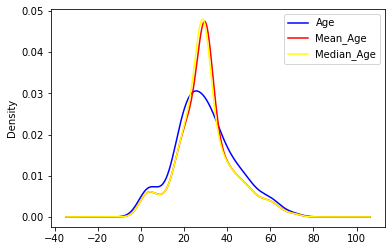

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
# original variable distribution
x_train['Age'].plot(kind='kde',color = 'blue')

# variable imputed with the mean
x_train['Mean_Age'].plot(kind='kde',color = 'red')

# variable imputed with the median
x_train['Median_Age'].plot(kind='kde',color = 'yellow')

plt.legend()
plt.show()


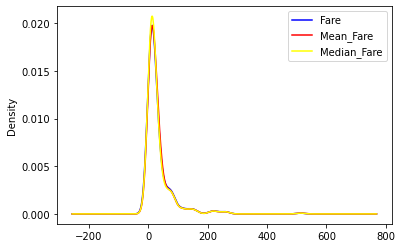

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
# original variable distribution
x_train['Fare'].plot(kind='kde',color = 'blue')

# variable imputed with the mean
x_train['Mean_Fare'].plot(kind='kde',color = 'red')

# variable imputed with the median
x_train['Median_Fare'].plot(kind='kde',color = 'yellow')

plt.legend()
plt.show()

In [19]:
x_train.cov()

,Age,Fare,Family,Mean_Age,Median_Age,Mean_Fare,Median_Fare
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.665205,64.858859
Fare,70.719262,2448.197914,17.258917,55.603719,57.957599,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.146106,-5.112563,16.385048,16.476305
Mean_Age,204.349513,55.603719,-5.146106,161.812625,161.812625,52.788341,51.358000
Median_Age,204.349513,57.957599,-5.112563,161.812625,161.989566,55.023037,53.553455
Mean_Fare,66.665205,2448.197914,16.385048,52.788341,55.023037,2324.238526,2324.238526
Median_Fare,64.858859,2448.197914,16.476305,51.358000,53.553455,2324.238526,2340.091022


In [20]:
x_train.corr()

,Age,Fare,Family,Mean_Age,Median_Age,Mean_Fare,Median_Fare
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.090156,0.087356
Fare,0.092644,1.000000,0.208268,0.088069,0.091757,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.244610,-0.242883,0.205499,0.205942
Mean_Age,1.000000,0.088069,-0.244610,1.000000,0.999454,0.086078,0.083461
Median_Age,1.000000,0.091757,-0.242883,0.999454,1.000000,0.089673,0.086982
Mean_Fare,0.090156,1.000000,0.205499,0.086078,0.089673,1.000000,0.996607
Median_Fare,0.087356,1.000000,0.205942,0.083461,0.086982,0.996607,1.000000


<AxesSubplot:>

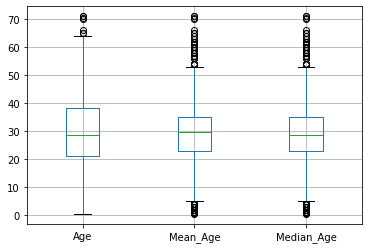

In [21]:
x_train[['Age','Mean_Age','Median_Age']].boxplot()

<AxesSubplot:>

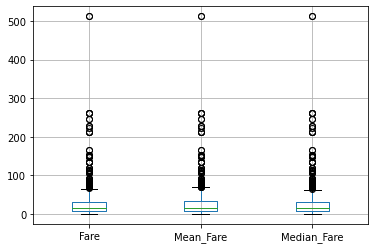

In [22]:
x_train[['Fare','Mean_Fare','Median_Fare']].boxplot()

## Using Sklearn to apply mean median imputation

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x , y,test_size = .2,random_state = 2)

In [27]:
x_train.shape,x_test.shape

((712, 3), (179, 3))

In [29]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [34]:
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')

In [35]:
transformer = ColumnTransformer([
    ('mean_imputer',mean_imputer,['Age']),
    ('mean_imputer_1',mean_imputer,['Fare']),
    
    
    ('median_imputer',median_imputer,['Age']),
    ('median_imputer_1',median_imputer,['Fare'])
],remainder = 'passthrough')

In [36]:
transformer.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('mean_imputer', SimpleImputer(), ['Age']),
                                ('mean_imputer_1', SimpleImputer(), ['Fare']),
                                ('median_imputer',
                                 SimpleImputer(strategy='median'), ['Age']),
                                ('median_imputer_1',
                                 SimpleImputer(strategy='median'), ['Fare'])])

In [37]:
transformer.named_transformers_.mean_imputer.statistics_

array([29.78590426])

In [41]:
transformer.named_transformers_.mean_imputer_1.statistics_

array([32.61759689])

In [42]:
transformer.named_transformers_.median_imputer.statistics_

array([28.75])

In [43]:
transformer.named_transformers_.median_imputer_1.statistics_

array([14.4583])

In [51]:
x_train_transformed = transformer.transform(x_train)
x_test_transformed = transformer.transform(x_test)

In [61]:
x_train_transformed

array([[ 40.        ,  27.7208    ,  40.        ,  27.7208    ,
          0.        ],
       [  4.        ,  16.7       ,   4.        ,  16.7       ,
          2.        ],
       [ 47.        ,   9.        ,  47.        ,   9.        ,
          0.        ],
       ...,
       [ 71.        ,  49.5042    ,  71.        ,  49.5042    ,
          0.        ],
       [ 29.78590426, 221.7792    ,  28.75      , 221.7792    ,
          0.        ],
       [ 29.78590426,  25.925     ,  28.75      ,  25.925     ,
          0.        ]])

In [62]:
pd.DataFrame(x_train_transformed)

,0,1,2,3,4
0,40.000000,27.7208,40.00,27.7208,0.0
1,4.000000,16.7000,4.00,16.7000,2.0
2,47.000000,9.0000,47.00,9.0000,0.0
3,9.000000,31.3875,9.00,31.3875,6.0
4,20.000000,9.8458,20.00,9.8458,0.0
...,...,...,...,...,...
707,30.000000,8.6625,30.00,8.6625,0.0
708,29.785904,8.7125,28.75,8.7125,0.0
709,71.000000,49.5042,71.00,49.5042,0.0
710,29.785904,221.7792,28.75,221.7792,0.0


In [59]:
x_train

,Age,Fare,Family
30,40.0,27.7208,0
10,4.0,16.7000,2
873,47.0,9.0000,0
182,9.0,31.3875,6
876,20.0,9.8458,0
...,...,...,...
534,30.0,8.6625,0
584,NaN,8.7125,0
493,71.0,49.5042,0
527,NaN,221.7792,0
